**EMNIST**

The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.

**Format**

There are six different splits provided in this dataset and each are provided in two formats:

    Binary (see emnist_source_files.zip)
    CSV (combined labels and images)
        Each row is a separate image
        785 columns
        First column = class_label (see mappings.txt for class label definitions)
        Each column after represents one pixel value (784 total for a 28 x 28 image)

**ByClass and ByMerge datasets**

The full complement of the NIST Special Database 19 is available in the ByClass and ByMerge splits. These two datasets have the same image information but differ in the number of images in each class. Both datasets have an uneven number of images per class and there are more digits than letters. The number of letters roughly equate to the frequency of use in the English language.

    train: 697,932
    test: 116,323
    total: 814,255
    classes: ByClass 62 (unbalanced) / ByMerge 47 (unbalanced)

**Balanced dataset**

The EMNIST Balanced dataset is meant to address the balance issues in the ByClass and ByMerge datasets. It is derived from the ByMerge dataset to reduce mis-classification errors due to capital and lower case letters and also has an equal number of samples per class. This dataset is meant to be the most applicable.

    train: 112,800
    test: 18,800
    total: 131,600
    classes: 47 (balanced)

**Letters datasets**

The EMNIST Letters dataset merges a balanced set of the uppercase and lowercase letters into a single 26-class task.

    train: 88,800
    test: 14,800
    total: 103,600
    classes: 37 (balanced)

**Digits and MNIST datasets**

The EMNIST Digits and EMNIST MNIST dataset provide balanced handwritten digit datasets directly compatible with the original MNIST dataset.

    train: Digits 240,000 / MNIST 60,000
    test: Digits 40,000 / MNIST 10,000
    total: Digits 280,000 / MNIST 70,000
    classes: 47 (balanced) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['emnist-mnist-mapping.txt', 'emnist-digits-train.csv', 'emnist-letters-mapping.txt', 'emnist-balanced-mapping.txt', 'emnist-mnist-train.csv', 'emnist-letters-train.csv', 'emnist-bymerge-train.csv', 'emnist-bymerge-test.csv', 'emnist_source_files', 'emnist-balanced-train.csv', 'emnist-mnist-test.csv', 'emnist-bymerge-mapping.txt', 'emnist-digits-mapping.txt', 'emnist-byclass-mapping.txt', 'emnist-letters-test.csv', 'emnist-digits-test.csv', 'emnist-byclass-test.csv', 'emnist-byclass-train.csv', 'emnist-balanced-test.csv']


In [2]:
train = pd.read_csv('../input/emnist-balanced-train.csv', header=None)

In [3]:
test = pd.read_csv('../input/emnist-balanced-test.csv', header=None)

In [4]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data = train.values[:, 1:]
train_labels = train.values[:, 0]
test_data = test.values[:, 1:]
test_labels = test.values[:, 0]

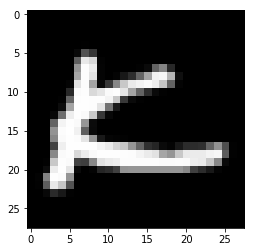

In [6]:

img_flip = np.transpose(train_data[8].reshape(28, 28), axes=[1,0])
plt.imshow(img_flip, cmap='Greys_r')
plt.show()

**Classificadores**

In [7]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [8]:
model = {}
y_pred = {}

In [9]:
model['perceptron'] = Perceptron()
model['sgd'] = SGDClassifier()
model['knn'] = KNeighborsClassifier()
model['nbayes'] = GaussianNB()
model['tree'] = DecisionTreeClassifier()
model['forest'] = RandomForestClassifier()
model['boosting'] = GradientBoostingClassifier()

**Resultados**

In [10]:
for idx in ['perceptron', 'sgd', 'knn', 'nbayes', 'tree', 'forest', 'boosting']:
    model[idx].fit(train_data, train_labels)
    y_pred[idx] = model[idx].predict(test_data)
    print(idx, metrics.accuracy_score(test_labels, y_pred[idx]))

perceptron 0.4620744680851064
sgd 0.4673936170212766
knn 0.7846276595744681
nbayes 0.281968085106383
tree 0.5890425531914893


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


forest 0.7410638297872341
boosting 0.7295744680851064
